In [26]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [27]:
X=6*np.random.rand(1000,1)-3
y=0.5 * X**2 +1.5*X +np.random.randn(1000,1)
#qudratic equation used y=0.5x^2+1.5*x+2+random outlier

Text(0, 0.5, 'yDatase')

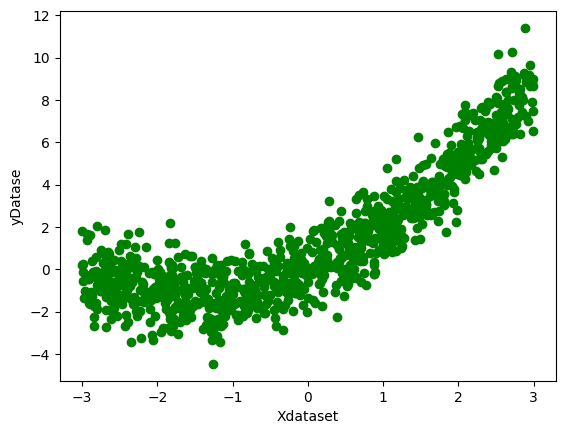

In [28]:
plt.scatter(X,y,color='green')
plt.xlabel("Xdataset")
plt.ylabel("yDatase")

In [29]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [30]:
# Strandardization
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)


In [31]:
#Lets implement simple linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
simpleLinearRegressionModel=lr.fit(X_train,y_train)
from sklearn.metrics import r2_score
y_pred=simpleLinearRegressionModel.predict(X_test)
r2_score=r2_score(y_test,y_pred)
r2_score

0.7461944150700367

Text(0, 0.5, 'yDatase')

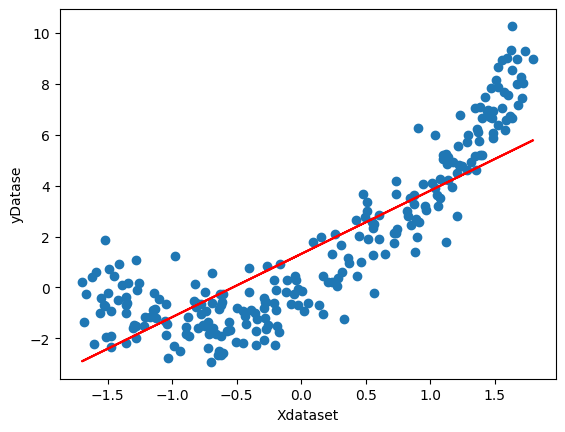

In [34]:
#Lest Visualize this model
plt.plot(X_test,y_pred,c='red')
plt.scatter(X_test,y_test)
plt.xlabel("Xdataset")
plt.ylabel("yDatase")

#### Adding Polynomial Features

In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,include_bias=False)
#LinearRegression has its own fit_intercept=True parameter (enabled by default)  but this would be needed in ols
#poly=PolynomialFeatures(degree=2, include_bias=True)

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)
X_train_poly

array([[-0.71305084,  0.50844151],
       [-0.40435588,  0.16350368],
       [-0.45782207,  0.20960105],
       ...,
       [-0.67351511,  0.45362261],
       [ 1.03842936,  1.07833553],
       [-0.34547617,  0.11935379]], shape=(750, 2))

In [41]:
from sklearn.linear_model import LinearRegression
regression2=LinearRegression()
regression2.fit(X_train_poly,y_train)
from sklearn.metrics import r2_score
y_pred=regression2.predict(X_test_poly)
r2_score=r2_score(y_test,y_pred)
r2_score

0.9154794640287509

In [43]:
print(regression2.coef_)
print(regression2.intercept_)

[[2.43748097 1.45984731]]
[-0.14189603]


<Axes: >

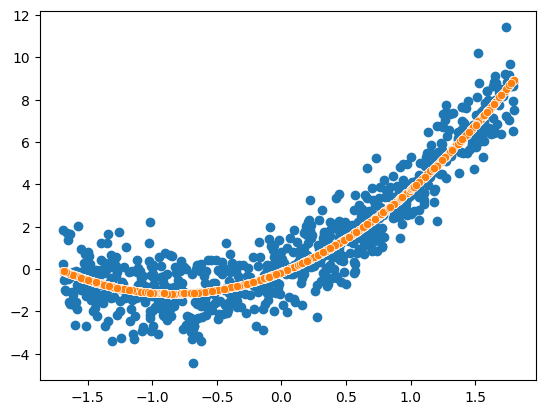

In [57]:
import seaborn as sns
#plt.scatter(X_train,regression2.predict(X_train_poly))
# Basic conversion
plt.scatter(X_train,y_train)
sns.scatterplot(x=X_train.flatten(), y=regression2.predict(X_train_poly).flatten())


In [ ]:
#3 Prediction of new data set
'''X_new = np.linspace(-3, 3, 2000)
In data science and machine learning, the command X_new = np.linspace(-3, 3, 2000) creates an array of 2,000 evenly spaced numbers starting at -3 and ending exactly at 3'''
X_new = np.linspace(-3, 3, 2000).reshape(2000, 1)
X_new_poly = poly.transform(X_new)


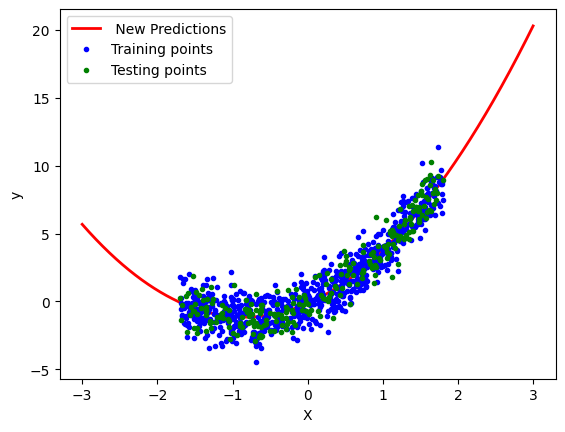

In [67]:
y_new = regression2.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Pipeline Concept

In [70]:
from sklearn.pipeline import Pipeline

In [71]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

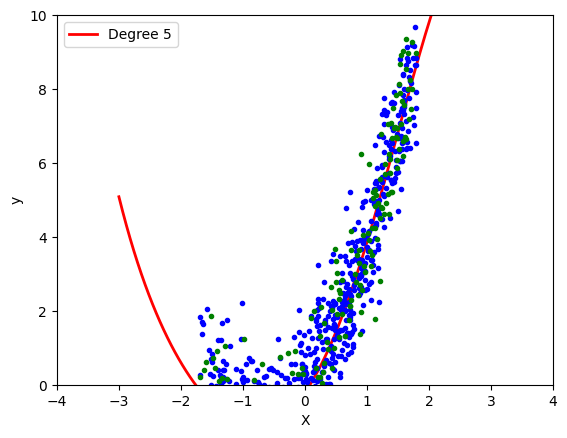

In [76]:
poly_regression(5)